<a href="https://colab.research.google.com/github/Adithyan773/Google-colab-models/blob/main/fraud_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

import opendatasets as od
import pandas as pd



In [ ]:
od.download('https://www.kaggle.com/datasets/kartik2112/fraud-detection')

Skipping, found downloaded files in "./fraud-detection" (use force=True to force download)


In [ ]:
df=pd.read_csv('/content/fraud-detection/fraudTrain.csv')# with random undersampling
df2=pd.read_csv('/content/fraud-detection/fraudTrain.csv')# without random undersampling
df3=pd.read_csv('/content/fraud-detection/fraudTrain.csv')#with random forest

In [ ]:
df.is_fraud.value_counts()

,count
is_fraud,
0,1289169
1,7506


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['trans_hour']=df['trans_date_trans_time'].dt.hour

In [ ]:
df.drop('trans_date_trans_time',axis=1,inplace=True)

In [ ]:
df2.drop('trans_date_trans_time',axis=1,inplace=True)

In [ ]:
df3.drop('trans_date_trans_time',axis=1,inplace=True)

In [ ]:
le=LabelEncoder()

df['category']=le.fit_transform(df['category'])
df['cc_num']=le.fit_transform(df['cc_num'])

In [ ]:
le2=LabelEncoder()

df2['category']=le.fit_transform(df2['category'])
df2['cc_num']=le.fit_transform(df2['cc_num'])

In [ ]:
le3=LabelEncoder()

df3['category']=le3.fit_transform(df3['category'])
df3['cc_num']=le3.fit_transform(df3['cc_num'])

In [ ]:
sc=StandardScaler()
df['amt']=sc.fit_transform(df[['amt']])
df['zip']=sc.fit_transform(df[['zip']])
df['city_pop']=sc.fit_transform(df[['city_pop']])

In [ ]:
sc2=StandardScaler()
df2['amt']=sc2.fit_transform(df2[['amt']])
df2['zip']=sc2.fit_transform(df2[['zip']])
df2['city_pop']=sc2.fit_transform(df2[['city_pop']])

In [ ]:
sc3=StandardScaler()
df3['amt']=sc3.fit_transform(df3[['amt']])
df3['zip']=sc3.fit_transform(df3[['zip']])
df3['city_pop']=sc3.fit_transform(df3[['city_pop']])

In [ ]:
bd=df.drop(['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant','merch_lat','merch_long'],axis=1)


In [ ]:
bd2=df2.drop(['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant','merch_lat','merch_long'],axis=1)


In [ ]:
bd3=df3.drop(['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant','merch_lat','merch_long'],axis=1)


In [ ]:
#encoder = OneHotEncoder()
#encoded_data = encoder.fit_transform(bd[['city']])
#encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['city']))
#bd = pd.concat([bd.drop('city', axis=1), encoded_df], axis=1)


In [ ]:
#bd['city'].value_counts()

In [ ]:
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(bd.drop('is_fraud', axis=1), bd['is_fraud'])

In [ ]:
bd= pd.DataFrame(X, columns=bd.columns[:-1])
bd['is_fraud'] = y

In [ ]:
bd2= pd.DataFrame(X, columns=bd2.columns[:-1])
bd2['is_fraud'] = y

In [ ]:
bd3= pd.DataFrame(X, columns=bd3.columns[:-1])
bd3['is_fraud'] = y

In [ ]:
bd

,cc_num,category,amt,zip,lat,long,city_pop,is_fraud
811778,62,2,0.098798,1.546945,34.0287,-118.4924,0.010659,0
1101718,207,0,0.096428,0.560228,36.7154,-89.6287,-0.290789,0
800013,736,4,0.180574,-1.240152,39.9636,-79.7853,-0.293554,0
398945,748,6,-0.176283,0.395911,48.2777,-112.8456,-0.291703,0
207455,498,11,-0.412380,-0.414144,36.4715,-82.4834,-0.005631,0
...,...,...,...,...,...,...,...,...
1295399,490,11,5.655450,-0.589021,27.6330,-80.4031,0.055682,1
1295491,490,11,7.114444,-0.589021,27.6330,-80.4031,0.055682,1
1295532,636,2,-0.374953,0.815274,30.4590,-90.9027,-0.057920,1
1295666,560,2,-0.303532,1.151158,31.8599,-102.7413,-0.294087,1


In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 811778 to 1295733
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cc_num    15012 non-null  int64  
 1   category  15012 non-null  int64  
 2   amt       15012 non-null  float64
 3   zip       15012 non-null  float64
 4   lat       15012 non-null  float64
 5   long      15012 non-null  float64
 6   city_pop  15012 non-null  float64
 7   is_fraud  15012 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.0 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
tr=DecisionTreeClassifier()
tr.fit(X_train,y_train)
y_pred=tr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1507
           1       0.96      0.97      0.97      1496

    accuracy                           0.97      3003
   macro avg       0.97      0.97      0.97      3003
weighted avg       0.97      0.97      0.97      3003



In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1507
           1       0.97      0.96      0.97      1496

    accuracy                           0.97      3003
   macro avg       0.97      0.97      0.97      3003
weighted avg       0.97      0.97      0.97      3003



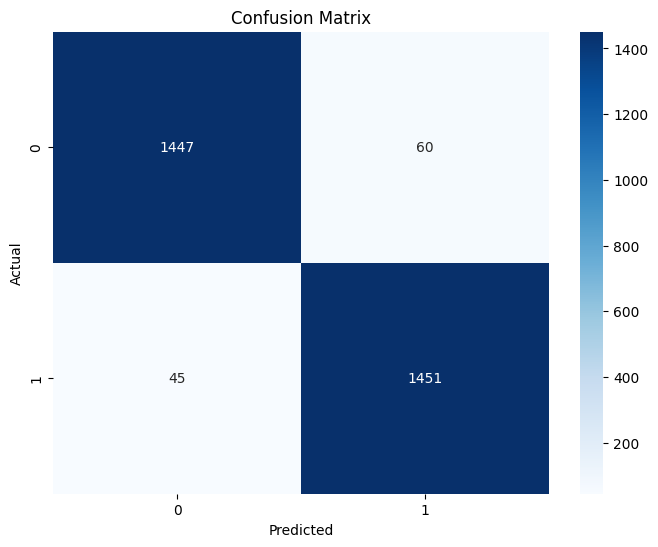

In [ ]:
y_pred = tr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=tr.classes_, yticklabels=tr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



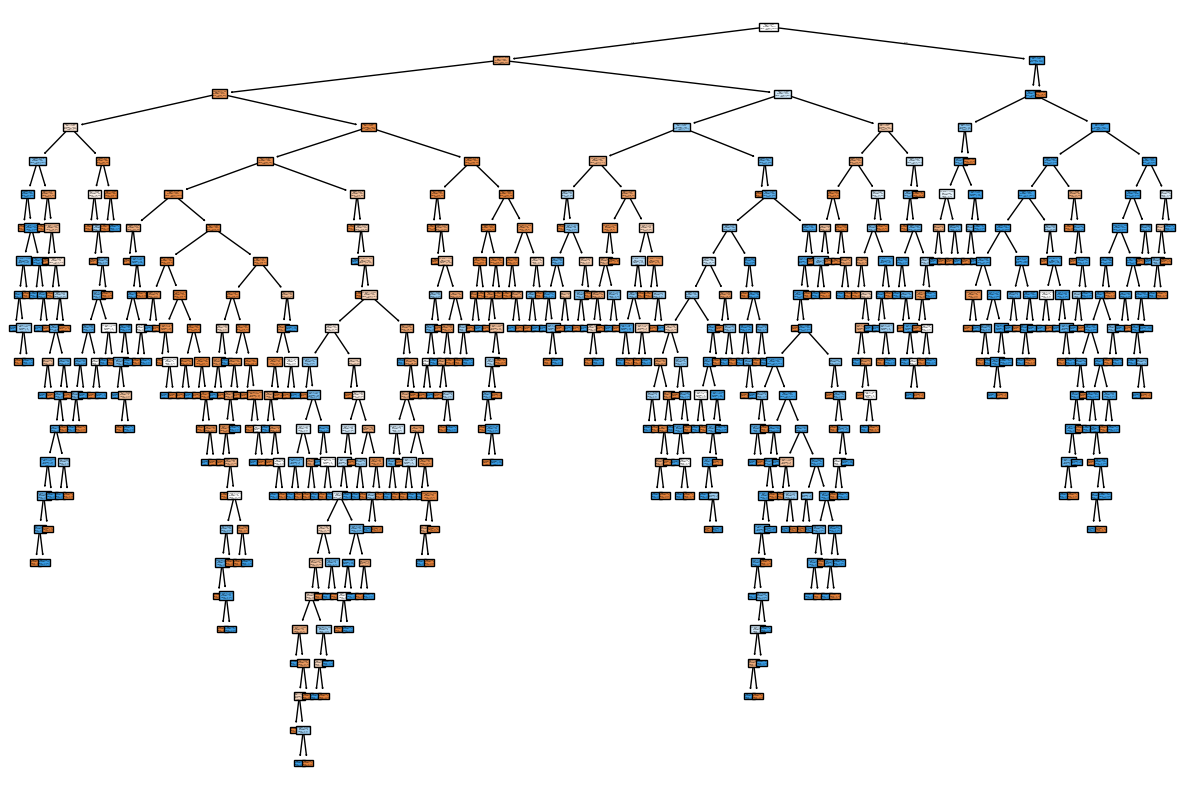

In [ ]:
plt.figure(figsize=(15, 10))
tr.classes_= [str(cls) for cls in tr.classes_]
plot_tree(tr, feature_names=X.columns, class_names=tr.classes_, filled=True)
plt.show()